In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1]:
%%bash
unzip Data.zip

Archive:  Data.zip


replace Data/data_10.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [48]:
all_df = []
file_address = "Data"

for file_num in range(1, 2501):  
    file_name = f"data_{file_num}.csv"
    file_path = os.path.join(file_address, file_name)
    
    if os.path.exists(file_path):
        temp_df = pd.read_csv(file_path)
        temp_df = temp_df.drop("Unnamed: 0", axis=1)
        pivot_data = temp_df.pivot(columns='day', values='value')
        reshaped_df = pivot_data.stack().reset_index(drop=True).to_frame().T

        reshaped_df['ID'] = file_name.split('.')[0]

        all_df.append(reshaped_df)

all_df = pd.concat(all_df, ignore_index=True)
print(all_df)

        0    1    2    3    4    5    6    7    8    9  ...    703     704  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00    0.00   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00    0.00   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  36.38    0.00   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00    0.00   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  12.99    0.00   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...     ...   
2495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00    0.00   
2496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00    0.00   
2497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00   11.98   
2498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00  280.92   
2499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.00   73.65   

      705    706   707    708   709   710  711         ID  
0  

______________
## strategy:

clustering by 3 featurs:

1. consuming rate 
2. visiting rate
3. Frequency of Visiting

In [5]:
from IPython.display import display, Math

formula1_1 = r"\text{Consuming number} = \left(\frac{\text{Purchase Amount}}{\text{Days of Consumption (zero purchase)}}\right) \text{ monthly}"
formula1_2 = r"\text{Consuming Rate} = \overline{\left(\frac{\text{average of consuming number in last month}}{\text{average of consuming number}}\right)} \cdot \frac{1}{\text{Absolute Covariance}}"
formula2 = r"\text{Visiting Rate} = \frac{\text{Visits in Last Month}}{\text{Average Number of Visits}}"

print()
display(Math(formula1_1))
print()
print()
display(Math(formula1_2))
print()
display(Math(formula2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

____________________________
## visiting rate:

In [49]:
all_df['vis_total'] = all_df.apply(lambda x: (x!=0).sum(), axis=1) 
all_df['vis_last_month'] = all_df.iloc[:, -30:].apply(lambda x: (x != 0).sum(), axis=1)
all_df['vis_rate'] = all_df['vis_last_month'] / (all_df['vis_total']/24)
all_df

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,ID,vis_total,vis_last_month,vis_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.29,0.0,0.00,0.00,0.00,0.0,data_1,79,7,2.126582
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,data_2,46,2,1.043478
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,data_3,47,3,1.531915
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,data_4,31,2,1.548387
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,data_5,34,4,2.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,data_2496,50,2,0.960000
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,data_2497,194,6,0.742268
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.90,12.3,0.00,0.00,6.99,0.0,data_2498,151,8,1.271523
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,9.38,0.00,0.0,data_2499,82,5,1.463415


## Consumming rate
**Functions:**

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to transform a list into row means
def row_means_trans(input_list):
    n = len(input_list)
    num_parts = 20
    
    # Find the number of parts that input_list can be divided into
    for num_parts in range(100, 9, -1):
        if (n % num_parts == 0):
            break
    
    # Calculate the size of each part
    part_size = n // num_parts
    
    # If the number of elements is not divisible by num_parts, return the original list
    if(n % num_parts != 0):
        return input_list
        
    # If there are not enough elements to divide into parts, set num_parts to 1
    if part_size == 0:
        num_parts = n
        part_size = 1
    
    # Calculate the mean of each part
    means = []
    for i in range(num_parts):
        start_idx = i * part_size
        end_idx = start_idx + part_size
        part_mean = np.mean(input_list[start_idx:end_idx])
        means.append(part_mean)

    print(f"the num_parts is === {num_parts}")
    return means

# Function to calculate absolute covariance with index
def absolute_covariance_with_index(input_list):
    n = len(input_list)
    
    # Calculate the mean of the input list
    mean = np.mean(input_list)
    
    # Calculate the absolute covariance with index
    abs_cov_with_index = 0
    for i in range(n):
        abs_cov_with_index += abs((i - mean) * (input_list[i] - mean))
    
    # Divide by the number of elements
    abs_cov_with_index /= n
    
    return abs_cov_with_index

# Function to split a list into chunks
def split_list_into_chunks(input_list, chunk_size):
    for i in range(0, len(input_list), chunk_size):
        yield input_list[i:i + chunk_size]

# Function to calculate the sum of zero elements in a chunk
def sum_zero_cal(chunk_list):
    first_non_zero_index = None
    for index, value in enumerate(chunk_list):
        if value != 0:
            first_non_zero_index = index
            break

    if first_non_zero_index is None:
        return 0  # If there are no non-zero elements in the list, return 0
    count_of_zeros = chunk_list.count(0)
    
    if count_of_zeros - first_non_zero_index <= 0:
        return 0  # If the count of zeros is less than or equal to the index of the first non-zero element, return 0
    
    chunk_sum = sum(chunk_list)
    return chunk_sum / (count_of_zeros - first_non_zero_index)

# Function to calculate consuming rate
def con_num_static(input_list):
    chunk_size = 30
    sums_list = []
    for chunk in split_list_into_chunks(input_list, chunk_size):
        chunk_sum = sum_zero_cal(chunk)
        sums_list.append(chunk_sum)
    return sums_list

# Function to calculate consuming rate based on regression slope
def consumming_rate(row, freq, regression_slope):
    # Calculate the mean of values in the row
    mean = np.mean(row)
    
    # Calculate the absolute covariance with index for the row
    covariance = absolute_covariance_with_index(row)
    
    # Calculate the consuming rate based on the regression slope and covariance
    con_rate = regression_slope / covariance
    print(f"The slope is === {regression_slope}")
    
    # Multiply by 100 to get the consuming rate as a percentage
    return con_rate * 100


## example regression for random customer


the data : 
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.84, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 248.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.37, 178.34000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

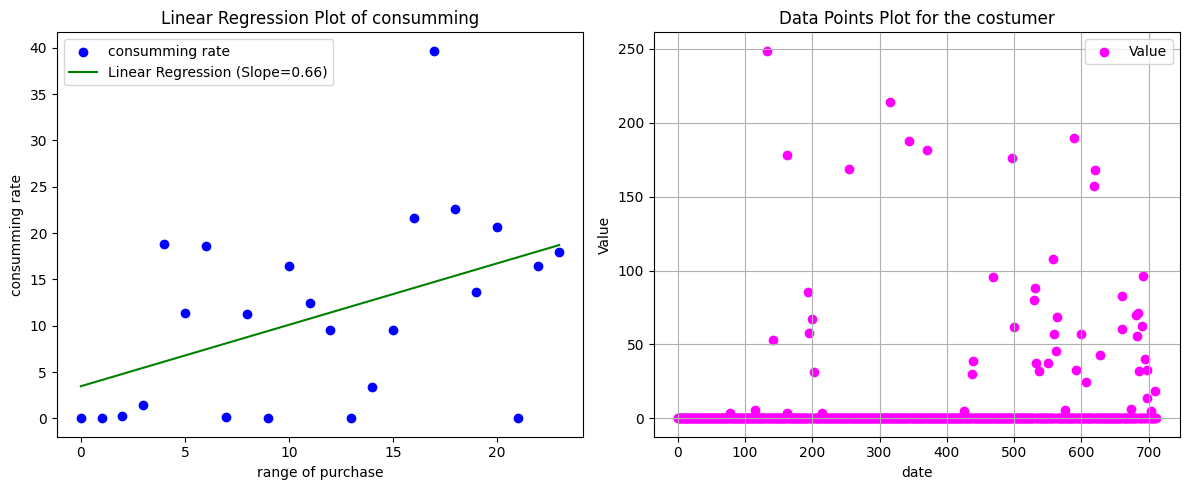

In [103]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

############یه مشتری رندوم
random_num=1146

random_row = all_df.iloc[random_num, :712]
print()
print(Fore.YELLOW + "the data : "+Fore.MAGENTA) 
print(random_row.tolist())
print(f"the length is === {len(random_row)}")

print()
print(Fore.YELLOW + "the consumming data : "+Fore.BLUE) 
random_row = con_num_static(list(random_row))
print(random_row)
print(f"the length is === {len(random_row)}")

# Convert the first row (which is a list) to a NumPy array
data_array = np.array(random_row)

# Get the number of columns
num_columns = len(data_array)

# Create an axis for regression
x_values = np.array(range(num_columns)).reshape(-1, 1)
y_values = data_array.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model with the data
model.fit(x_values, y_values)

# Get the slope of the regression line (coefficient)
slope = model.coef_[0][0]

# Plot the linear regression graph
plt.figure(figsize=(12, 5))

# Plot the linear regression graph on the left
plt.subplot(121)
plt.scatter(x_values, y_values, color='blue', label='consumming rate')
plt.plot(x_values, model.predict(x_values), color='green', label=f'Linear Regression (Slope={slope:.2f})')
plt.title('Linear Regression Plot of consumming')
plt.xlabel('range of purchase')
plt.ylabel('consumming rate')
plt.legend()

# Plot the data points on the right
plt.subplot(122)
def plot_row(row):
    # Create an axis for the plot
    x_values = np.array(range(len(row)))
    y_values = row

    # Plot the data points with orange color
    plt.scatter(x_values, y_values, color='magenta', label='Value')
    plt.title('Data Points Plot for the costumer')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

# Example usage: plot the first row on the right
plot_row(all_df.iloc[random_num, :712])  # Replace with the desired row

# Adjust spacing between plots
plt.tight_layout()

print(Fore.RESET)
print(Fore.YELLOW + "results of this customer :  "+Fore.GREEN) 
print(f"consumming rate is === {consumming_rate(random_row,int(all_df.iloc[random_num]['vis_total']),slope)}")

# Show both plots
plt.show()


In [69]:
for random_num in range(0,2500):

    random_row = all_df.iloc[random_num, :712]
    random_row = con_num_static(list(random_row))
    data_array = np.array(random_row)

    # Get the number of columns
    num_columns = len(data_array)

    # Create an axis for regression
    x_values = np.array(range(num_columns)).reshape(-1, 1)
    y_values = data_array.reshape(-1, 1)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model with the data
    model.fit(x_values, y_values)

    # Get the slope of the regression line (coefficient)
    slope = model.coef_[0][0]

    all_df.at[random_num, 'consumming_rate'] = consumming_rate(random_row, int(all_df.iloc[random_num]['vis_total']), slope)

all_df


the slope is === 0.14886892354247924
the slope is === 0.04147610429041877
the slope is === -0.1302398896677837
the slope is === -0.19996958757184843
the slope is === -0.106429004670744
the slope is === -0.1250446747005145
the slope is === 0.3479334079480459
the slope is === 0.5820215196775499
the slope is === 0.12373715513842369
the slope is === -0.0945968726163234
the slope is === -0.012395149758454104
the slope is === 0.028221739130434784
the slope is === 1.1894002611745018
the slope is === 0.14427387797038077
the slope is === 0.12849979481276114
the slope is === -0.19387607493282757
the slope is === -0.79573415154667
the slope is === 0.8534566189329165
the slope is === 3.3558971584007566
the slope is === 1.785239033271077
the slope is === 0.14758493861434935
the slope is === 0.18866775151412266
the slope is === -0.058257531101016904
the slope is === -0.0057001443899605
the slope is === 0.12783376413292538
the slope is === 0.038831799764562976
the slope is === 4.027537138489006
the s

,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,ID,vis_total,vis_last_month,vis_rate,consumming_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_1,79,7,2.126582,0.811206
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_2,46,2,1.043478,0.148854
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_3,47,3,1.531915,-0.377696
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_4,31,2,1.548387,-0.863823
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_5,34,4,2.823529,-0.337633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_2496,50,2,0.960000,-0.182695
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,data_2497,194,6,0.742268,0.492273
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.3,0.00,0.00,6.99,0.0,data_2498,151,8,1.271523,1.035134
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,9.38,0.00,0.0,data_2499,82,5,1.463415,0.500896


____________

## kmeans 


Customers who need discount are :
['data_6', 'data_13', 'data_36', 'data_56', 'data_57', 'data_58', 'data_64', 'data_67', 'data_78', 'data_85', 'data_88', 'data_91', 'data_95', 'data_97', 'data_98', 'data_99', 'data_101', 'data_110', 'data_113', 'data_115', 'data_123', 'data_127', 'data_131', 'data_142', 'data_143', 'data_149', 'data_158', 'data_161', 'data_184', 'data_196', 'data_198', 'data_219', 'data_235', 'data_239', 'data_243', 'data_253', 'data_258', 'data_262', 'data_275', 'data_285', 'data_287', 'data_290', 'data_294', 'data_303', 'data_304', 'data_328', 'data_330', 'data_345', 'data_351', 'data_354', 'data_356', 'data_361', 'data_371', 'data_386', 'data_389', 'data_393', 'data_397', 'data_400', 'data_404', 'data_413', 'data_418', 'data_421', 'data_426', 'data_432', 'data_442', 'data_445', 'data_468', 'data_489', 'data_493', 'data_510', 'data_513', 'data_523', 'data_526', 'data_553', 'data_560', 'data_567', 'data_586', 'data_588', 'data_591', 'data_598', 'data_607', 'data_608

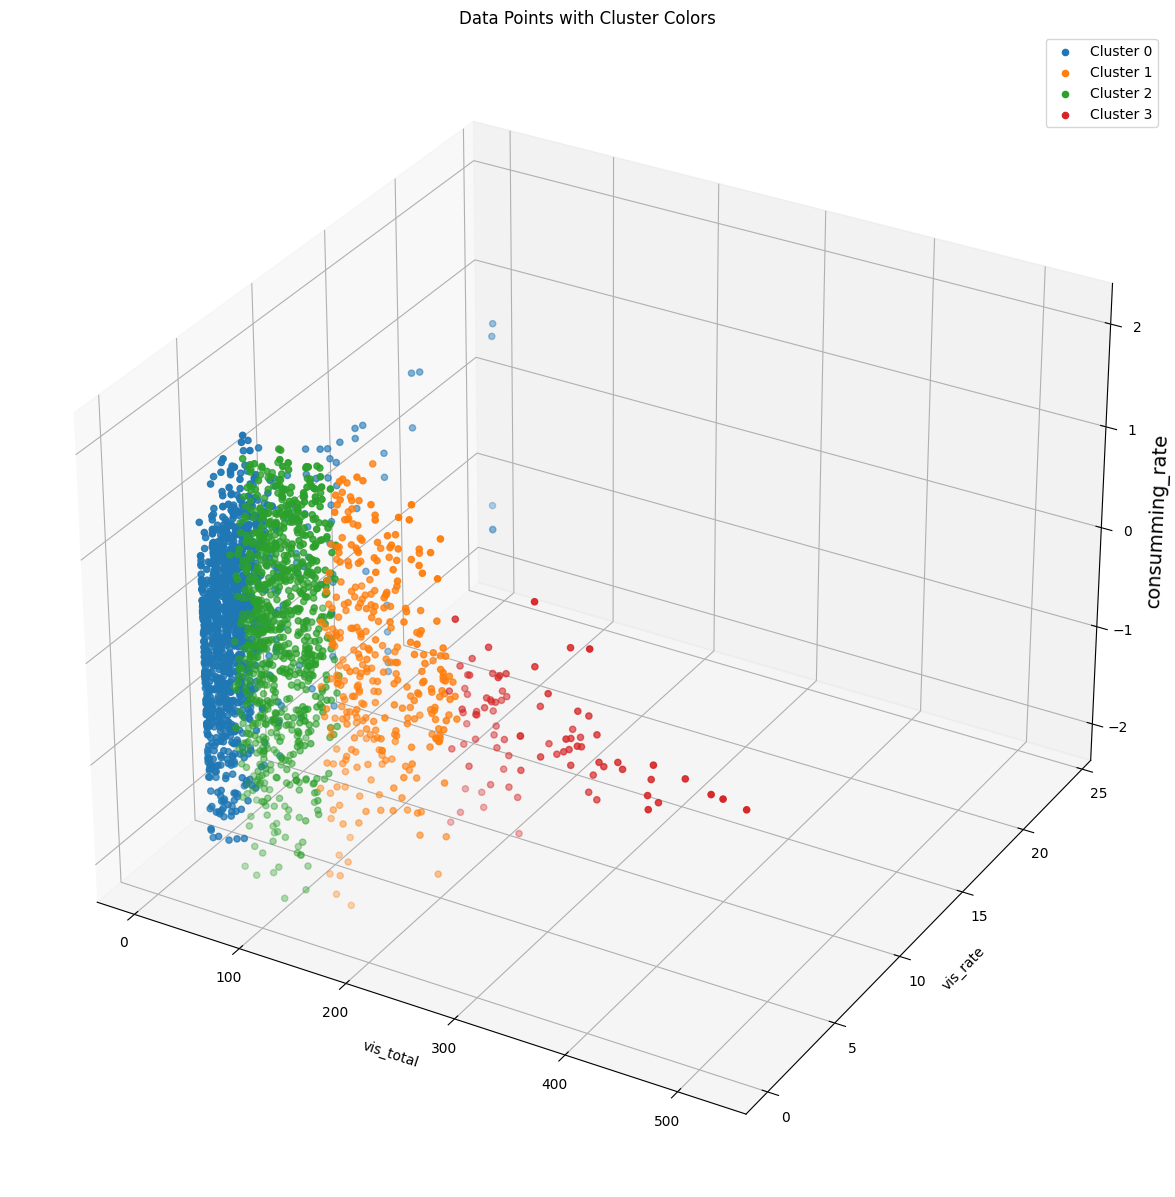

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Replace 'your_dataframe' with the actual name of your DataFrame
your_dataframe = all_df

# Assuming you have columns 'vis_total', 'vis_rate', and 'consumming_rate' in your DataFrame
X = your_dataframe[['vis_total', 'vis_rate', 'consumming_rate']].values

# Define the number of clusters (you can change this)
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Add a new column 'cluster' to the DataFrame
your_dataframe['cluster'] = cluster_labels

# Plotting the data points with cluster colors
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], X[cluster_labels == i, 2], label=f'Cluster {i}')

ax.set_xlabel('vis_total')
ax.set_ylabel('vis_rate')
ax.set_zlabel('consumming_rate', fontsize=14)  
ax.set_title('Data Points with Cluster Colors')
ax.legend()

# Print the list of bar customers (e.g., customers in Cluster 1)
bar_customers = your_dataframe[your_dataframe['cluster'] == 1]['ID'].tolist()
print()
print(Fore.YELLOW+"Customers who need discount are :"+Fore.BLUE)
print(bar_customers)
print()
print(Fore.YELLOW+"number of them :"+Fore.WHITE)
print(len(bar_customers))
print()
plt.show()


____________________
## elbow

c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Abdelahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: Fu

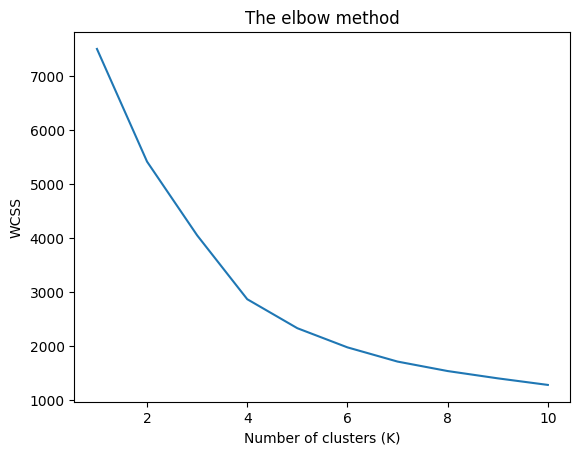

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure all column names are of string type
all_df.columns = all_df.columns.astype(str)

# Select only the numeric columns for clustering
numeric_columns = all_df[['vis_total', 'consumming_rate', 'vis_rate']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


## top three

In [110]:
# Calculate the total values for each customer
total_values = your_dataframe.groupby('ID')[['vis_total', 'vis_rate', 'consumming_rate']].sum()

# Find the top customer for each feature
top_customer_vis_total = total_values.nlargest(1, 'vis_total').index[0]
top_customer_vis_rate = total_values.nlargest(1, 'vis_rate').index[0]
top_customer_consumming_rate = total_values.nlargest(1, 'consumming_rate').index[0]

# Print the IDs of the top customers for each feature
print(Fore.YELLOW+"Top Customer for vis_total:     ", top_customer_vis_total)
print(Fore.GREEN+"Top Customer for vis_rate:     ", top_customer_vis_rate)
print(Fore.BLUE+"Top Customer for consumming_rate:     ", top_customer_consumming_rate)
  

Top Customer for vis_total:      data_900
Top Customer for vis_rate:      data_1830
Top Customer for consumming_rate:      data_518
